# Sentiment Analysis of Fall Out Boy Albums Over Time

Author: **Maya Sivanandan**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [1]:
%load_ext autoreload
%autoreload 2

Run the cell below to download the Vader module from the Natural Language Toolkit, if you have not done so before.

In [ ]:
nltk.downloader.download('vader_lexicon')

To ensure that the plots display properly in this document, run the code cell below:

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Introduction

This project investigates how the sentiment of Fall Out Boy albums changed over time. While this results of this project are not inherently important (except for, perhaps, the avid fan), the project allows insight into the process of sentiment analysis and the use of train data sets in this form of machine learning. This project demonstrates not only changing sentiment across Fall Out Boy albums, but also the importance of using an appropriate train data set.

## Methodology

*Note: Since this essay is focused on the sentiment analysis of Fall Out Boy album, the writing with reference that band. However, the functions should work from any band or artist whose lyrics are on AZ lyrics. That being said, `"falloutboy"` is the default argument of `analyze_sentiment()`.*


Four functions are used in this project, `get_album_titles()`, `links_by_album()`, `collate_lyrics()`, `analyze_sentiment()`, all of which are in `song_analysis.py`. `get_album_titles()` and `links_by_album()` use the Requests library to pull the HTML data from the [AZ lyrics page for Fall Out Boy](https://www.azlyrics.com/f/falloutboy.html). The results of these requests were then interpretted using the Beautiful Soup Library, which makes it easier to process the data. In `get_album_titles()`, a list of strings is returned, containing the name of each Fall Out Boy album. `links_by_album()` return a list of lists of the links to the AZ lyrics page of each Fall Out Boy song, separated by album. `collate_lyrics()` also uses the Request library and Beautiful Soup, though it makes a pull request from the each of the song pages in the list output by `links_by_album()`. It then takes the text on this page representing the song's lyrics and adds it to a string of the lyrics of other songs from within the same album. The function then outputs a list of the lyrics strings from each album.



`analyze_sentiment()` then uses sentiment analysis on these strings of lyrics. Sentiment Analysis of assigning a value to text that represents whether the tone of the writing is positive, negative, or neutral. To do this the text is first tokenized, meaning it is separated into smaller pieces, either individual words or short phrases. Using the SentimentIntensityAnalyzer() function from the Vader module, these 'tokens' are then compared to a set of train data and assigned a postive, negative, and neutral sentiment score. These 3 values are then used to calculate the compound sentiment score, a score between -1 and 1 where a negative score represents a negative overall sentiment and a postive score represents a overall postive sentiment.

## Results and Conclusions
In the results, you should show the main summaries or visualizations of your data, along with any accompanying information. In doing so, you should answer the following questions:

What summaries or visualizations did you create?
What are the interesting and/or important parts of these summaries or visualizations?
How do these results answer your questions or tell your story

In [18]:
import song_analysis
score_list = song_analysis.analyze_sentiment()

In [22]:
album_list = song_analysis.get_album_titles("falloutboy")

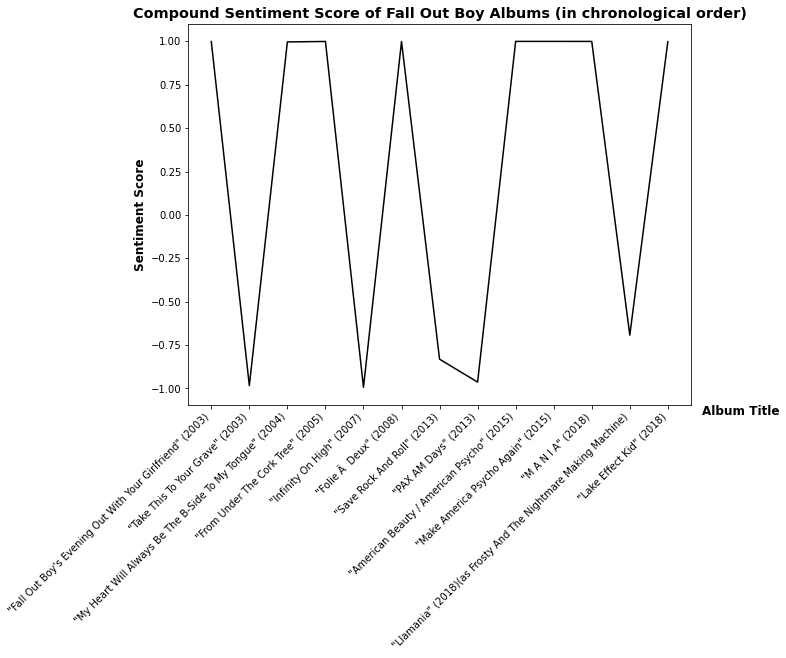

In [27]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(album_list[0:-1])), score_list[2], c="k")
plt.xticks(np.arange(len(album_list[0:-1])), (album_list[0:-1]))
ax.set_xticklabels(album_list[0:-1], rotation = 45, ha="right")
plt.title("Compound Sentiment Score of Fall Out Boy Albums (in chronological order)", fontweight='bold', fontsize = "x-large")
plt.ylabel("Sentiment Score", fontweight='bold', fontsize = "large")
label = plt.xlabel("Album Title", fontweight='bold', fontsize = "large")
ax.xaxis.set_label_coords(1.1, 0)

The above graph shows the compound sentiment score of each Fall Out Boy album over time. Though the compound score is meant to be a combination of all three calculated sentiment scores (positive, negative, and neutral), these results are highly polarized, with all but two of the albums having essentially either the most positive or negative scores possible. One possible explanation for this is that the train data used in the Vader module simply does not contain many of the words that occur in Fall Out Boy lyrics, resulting in the albums all having relatively high neutral sentiment scores. While one would think that this would cause less polarized results, the algorithm used to calculate the compound score has a significant consideration of the neutral sentiment score; the neutral sentiment score is not just treated as 0 and ignored.

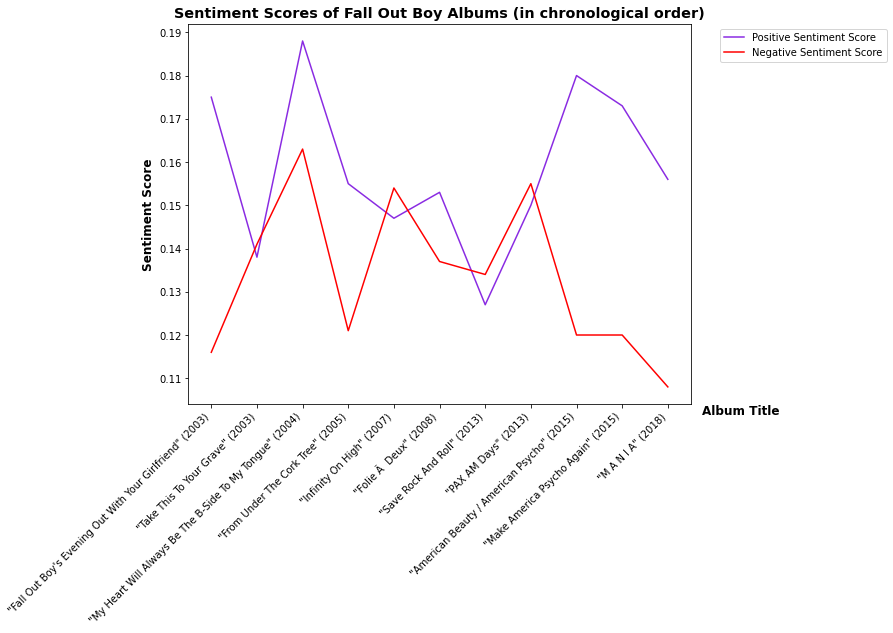

In [28]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
plt.plot(score_list[0][0:-2], c="BlueViolet")
plt.plot(score_list[1][0:-2], c="r")
plt.xticks(np.arange(len(album_list[0:-3])), (album_list[0:-3]))
ax.set_xticklabels(album_list[0:-3], rotation = 45, ha="right")
plt.legend(["Positive Sentiment Score", "Negative Sentiment Score"], bbox_to_anchor=(1.4, 1))
plt.title("Sentiment Scores of Fall Out Boy Albums (in chronological order)", fontweight='bold', fontsize = "x-large")
plt.ylabel("Sentiment Score", fontweight='bold', fontsize = "large")
label = plt.xlabel("Album Title", fontweight='bold', fontsize = "large")
ax.xaxis.set_label_coords(1.1, 0)

An alternative to looking at the compoun sentiment score is to look at the individual positive and negative sentiment scores of each of the albums, as shown in the graph above. This graph shows more nuance than the previous one as it shows how an lyrics of an album can express both positive and negative sentiments. The breakdown of scores is also interesting because it can portray not only the largest difference between positive and negative sentiment scores, which could be seen as the most positive or most negative album, but it also shows albums that have both high positive and high negative scores, such as "My Heart Will Always Be The B-Side To My Tongue", which could be interpretted as the most emotional album.

Overall, while this project itself does not have any significant ethical implications, sentiment analysis may have some ethical aspects to consider. For example, as seen in this project, having a biased dataset could drastically skew the sentiment scores given to a piece of text. Though sentiment analysis is not currently widely used, it could potentially be applied in the context of automated content moderation on social media. If a the original dataset it biased it may accidentally cause content to be unnecessarily deleted due to being mislabelled as 'too negative'. However, even with a perfectly unbiased train data set, sentiment analysis applications still run into ethical issues. While automatically removing negative comments may be beneficial to content creators or public figures who may be subject to frequent public scrutiny, it could also be used to remove legitimate critism that should be shared. If social media platforms start choosing to limit 'negativity' to create a more 'positive', how would that affect those who uses these site to expressed shared grievances or critique large scale problems in the world. While clearly not all negativity online is beneficial, there has to be some understanding of constructive 'negativity', which is not completely captured in sentiment analysis.

## Improvements

The biggest problem I had with this project was getting repeatedly banned from AZ lyrics for making data requests too frequently. Originally, I thought there was a problem in my own code and couldn't figure out why data that was essentially the same was being treat so differently and causing my function to fail. Even after I realized what the true issue was, it took multiple attempts to find a pause length that would prevent any errors from occuring. I eventually jumped from a 6 second delay (which did cause be to be blocked) to the 10 second delay that is currently implemented, so the required pause may be lower than currently implemented. Since a 10 second pause in every loop makes the function take a very long time, and I would like to find a way to get around this issue, or at the very least have a more efficient way of testing pause lengths to have the minimum possible pause length.

One of the largest insights I had in this project was the importance of having a train data set that would be able to accurately represent the test data that would be processed. While I don't regret using an external train dataset to avoid my own bias that would come about from attributing sentiment scores to words myself, it does make me much more interested in the process of how train datasets are made, specifically those which measure something as subjective as sentiment. In the future I would either take the time to properly make my own dataset or search for one that alligned better with the text I was analyzing.